# Определение перспективного продукта для интернет-магазина

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Инструкция по выполнению проекта

<b>Шаг 1. Откройте файл с данными и изучите общую информацию</b>

Путь к файлу: /datasets/games.csv.

<b>Шаг 2. Подготовьте данные</b>
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
  - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
  - Опишите причины, которые могли привести к пропускам;
  - Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
 - Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

<b>Шаг 3. Проведите исследовательский анализ данных</b>
 - Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
 - Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
 - Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
 - Не учитывайте в работе данные за предыдущие годы.
 - Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
 - Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
 - Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
 - Соотнесите выводы с продажами игр на других платформах.
 - Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

<b>Шаг 4. Составьте портрет пользователя каждого региона</b>

Определите для пользователя каждого региона (NA, EU, JP):
 - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
 - Самые популярные жанры (топ-5). Поясните разницу.
 - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

<b>Шаг 5. Проверьте гипотезы</b>
 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
 - Как вы сформулировали нулевую и альтернативную гипотезы;
 - Какой критерий применили для проверки гипотез и почему.

<b>Шаг 6. Напишите общий вывод</b>

## Знакомство с данными

<b>Описание данных</b>

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

<b>Импортируем необходимые для исследования библиотеки.</b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

Чтение датасета и первичное изучение информации.

In [ ]:
df = pd.read_csv('/datasets/games.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Проверим датафрейм на наличие явных дубликатов.

In [ ]:
df.duplicated().sum()

0

Явных дубликатов не выявлено.

### Вывод

Предварительно можно утверждать, что полноты предоставленных данных достаточно для проведения анализа.

Но в датафрейме обнаружены проблемы:
- В нескольких столбцах пропущены значения;
- Названия столбцов не приведены к нижнему регистру;
- Необходимо изменить тип данных в нескольких столбцах.

## Предобработка данных

### Приведение названий столбцов к нижнему регистру

In [ ]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразование типов данных

В столбцах 'year_of_release' и 'critic_score' можно изменить тип данных на 'int' для оптимизации расхода памяти. Помотрим списки значений в этих столбцах.

Если посмотреть последние строки датафрейма, то в них наблюдается отсутствие оценок и рейтингов у игр, продажи которых на совсем низком уровне (они либо не "выстрелили", либо ещё не раскрутились), что вполне логично, как мне кажется.

Также я полагаю, что связь между пропусками в оценках и тем, что оценки выставляет американская компания если и есть, то она не должна быть весомой: рейтинговое агенство могло не ставить оценки играм, которые выпускаются не для американского рынка, например, или имеют уровень продаж ниже некой заранее определённой границы.

In [ ]:
df.tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [ ]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [ ]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Аномалий не выявлено. Тип данных можно будет изменить после решения проблемы с пропусками.

В столбце 'user_score' записаны числа типом 'object'. Приведём их к 'float'. Проверим значения данных в этом столбце.

In [ ]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Выявлено аномальное значение 'tbd'.

In [ ]:
display(df[df['user_score'] == 'tbd'].count())

name               2424
platform           2424
year_of_release    2376
genre              2424
na_sales           2424
eu_sales           2424
jp_sales           2424
other_sales        2424
critic_score       1082
user_score         2424
rating             2374
dtype: int64

Удалить строки с данном аномалией нельзя, так как они составляют 15% датафрейма. Поиск в интернете подсказал, что это сокращение может означать, что рейтнг не определён (фактически приравнивается к NaN). Возможно, рейтинг пользователей по этим играм не собирался или не попал в наш датафрейм по ошибке. Приведём данные в столбце к вещественному типу.

In [ ]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


### Обработка пропусков

<b>Проверка пропусков в столбце 'name'.</b>

In [ ]:
#df['name'] = df['name'].fillna('SSSTTT')
#df[df['name'] == 'SSSTTT']

Пропущены названия игр 1993, также у них не заполнены жанр и оценки, довольно низкие продажи. Эти пропуски можно удалить. Причиной пропущенных названий могло быть то, что у игры не было постоянного имени или его решили не фиксировать ввиду невысокой популярности игры.

In [ ]:
df = df.dropna(subset=['name']).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


<b>Проверка пропусков в столбце 'year_of_release'</b>

In [ ]:
#df['year_of_release'] = df['year_of_release'].fillna('SSSTTT')
#df[df['year_of_release'] == 'SSSTTT']

Причиной пропущенных значений могла стать ошибка при переносе данных из большой внешней базы. Пропуски занимают 1.5% датафрейма,их замена случайными значениями может исказить картину в дальнейшем исследовании. Принимаю решение об их удалении.

In [ ]:
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Изменим тип данных в этом столбце.

In [ ]:
df['year_of_release'] = df['year_of_release'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


<b>Пропуски в столбцах 'critic_score', 'user_score' и 'rating'.</b>

In [ ]:
#df['user_score'] = df['user_score'].fillna('SSSTTT')
#df[df['user_score'] == 'SSSTTT']
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Системы в пропусках не наблюдается, кроме того, что они часто отсутствуют в зависимости друг от друга. Пропущенные значения в этих данных могли появиться в следствие того, что эти игры не оценивались или данные не были занесены по ошибке. Заменять их чем-то случайным не станем, удалять также не будем, чтобы не жертвовать почти половиной датафрейма. Оставим так, как есть.

Заменим пропуски в столбце с рейтингами значением *Unknown*.

In [ ]:
df['rating'] = df['rating'].fillna('Unknown')

### Суммарные продажи во всех регионах

In [ ]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown


In [ ]:
df['general_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis='columns')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


### Вывод

Данные прошли предобработку и готовы к дальнейшему исследованию.
Из датафрейма удалено 1.6% данных.

## Исследовательский анализ данных

### Распределение по годам

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

<Figure size 1440x720 with 0 Axes>

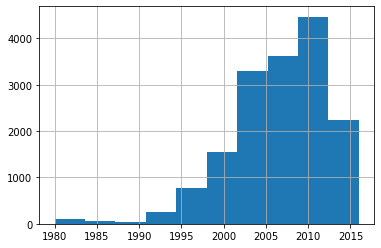

<Figure size 1440x720 with 0 Axes>

In [ ]:
display(df['year_of_release'].describe())
df['year_of_release'].hist(bins=10)
plt.figure(figsize=[20, 10])

Большая часть выпущенных игр приходится на период с 2002 до 2016 года. Более ранние даты вообще можно не рассматривать. В 2009-2012 годах наблюдается всплеск по производству игр.

### Динамика продаж по платформам

Отсортируем платформы по объёмам продаж.

In [ ]:
df.pivot_table(index='platform', values='general_sales', aggfunc='sum').sort_values('general_sales', ascending=False)

,general_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Посмотрим, как менялись продажи по платформам с самыми большими суммарными объёмами продаж.

<AxesSubplot:xlabel='platform,year_of_release'>

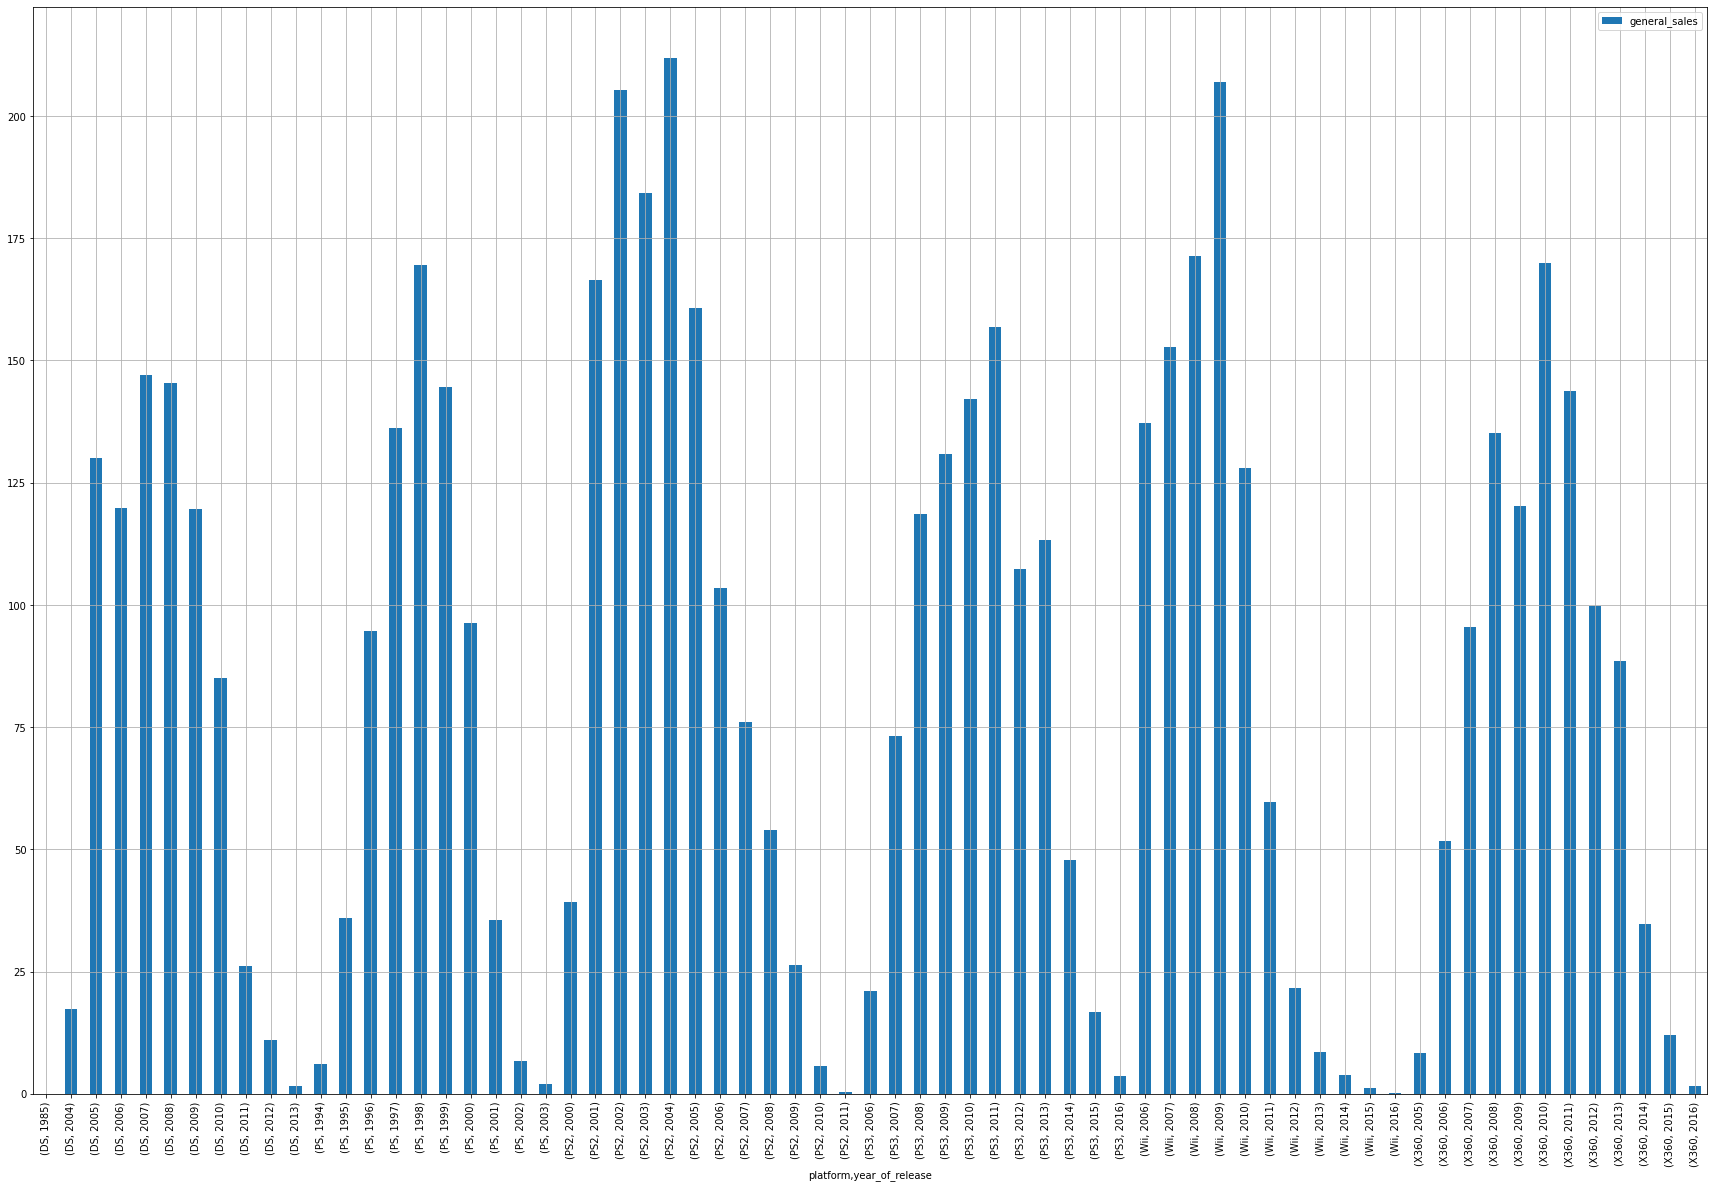

In [ ]:
(
    df
    .pivot_table(index=['platform', 'year_of_release'], values='general_sales', aggfunc='sum')
    .query('platform in ["PS2", "X360", "Wii", "PS3", "DS", "PS"]')
    .plot(y='general_sales',
         kind='bar',
         figsize=(30,20),
         grid=True)
)

На графике чётко просматривается периодичность "жизненного" цикла игровых платформ, она составляет 8-10 лет.

### Выбор и анализ актуального периода для прогноза

За актуальный период для проведения анализа возьмём 2014-2016 гг.

In [ ]:
topical_period = df[df['year_of_release'] >= 2014].reset_index(drop=True)
topical_period.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  general_sales    1689 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 158.5+ KB


Как и во всём представленном датафрейме, здесь много пропусков в оценках и рейтинге. В остальном, срез вполне пригоден для анализа и составления прогноза.

#### Проверим консоли, попавшие в выбранный период.

In [ ]:
topical_period['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

Text(0.5, 1.0, 'PSP')

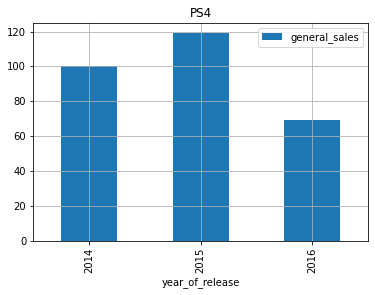

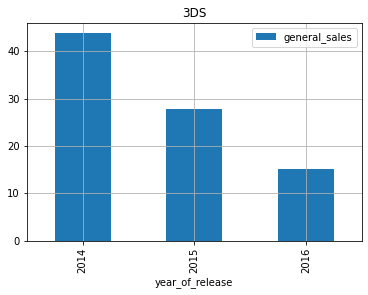

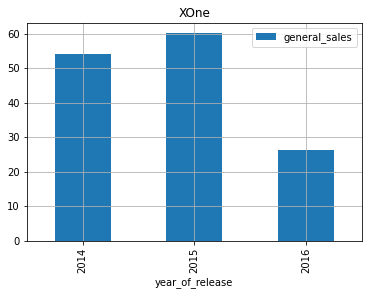

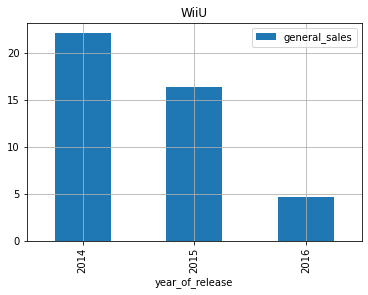

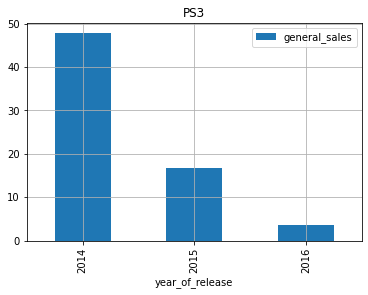

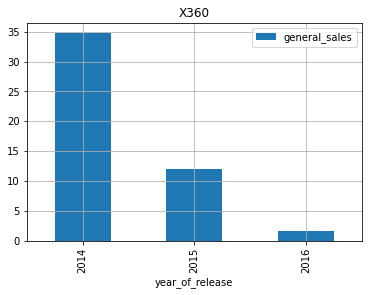

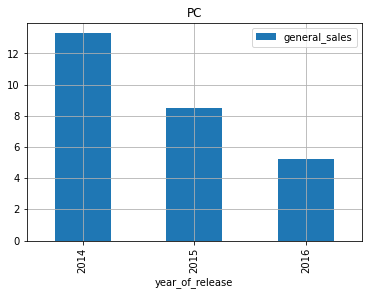

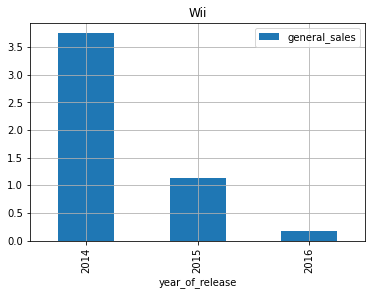

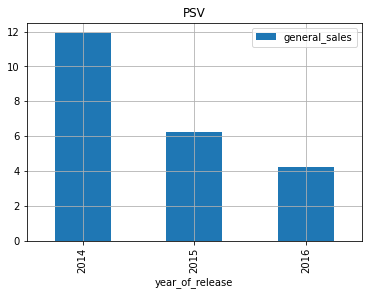

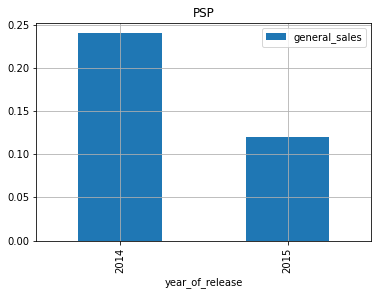

In [ ]:
(
    topical_period
    .query('platform == "PS4"')
    .pivot_table(index='year_of_release', values='general_sales', aggfunc='sum')
    .plot(y='general_sales', kind='bar', grid=True)
)
plt.title('PS4')

(
    topical_period
    .query('platform == "3DS"')
    .pivot_table(index='year_of_release', values='general_sales', aggfunc='sum')
    .plot(y='general_sales', kind='bar', grid=True)
)
plt.title('3DS')

(
    topical_period
    .query('platform == "XOne"')
    .pivot_table(index='year_of_release', values='general_sales', aggfunc='sum')
    .plot(y='general_sales', kind='bar', grid=True)
)
plt.title('XOne')

(
    topical_period
    .query('platform == "WiiU"')
    .pivot_table(index='year_of_release', values='general_sales', aggfunc='sum')
    .plot(y='general_sales', kind='bar', grid=True)
)
plt.title('WiiU')

(
    topical_period
    .query('platform == "PS3"')
    .pivot_table(index='year_of_release', values='general_sales', aggfunc='sum')
    .plot(y='general_sales', kind='bar', grid=True)
)
plt.title('PS3')

(
    topical_period
    .query('platform == "X360"')
    .pivot_table(index='year_of_release', values='general_sales', aggfunc='sum')
    .plot(y='general_sales', kind='bar', grid=True)
)
plt.title('X360')

(
    topical_period
    .query('platform == "PC"')
    .pivot_table(index='year_of_release', values='general_sales', aggfunc='sum')
    .plot(y='general_sales', kind='bar', grid=True)
)
plt.title('PC')

(
    topical_period
    .query('platform == "Wii"')
    .pivot_table(index='year_of_release', values='general_sales', aggfunc='sum')
    .plot(y='general_sales', kind='bar', grid=True)
)
plt.title('Wii')

(
    topical_period
    .query('platform == "PSV"')
    .pivot_table(index='year_of_release', values='general_sales', aggfunc='sum')
    .plot(y='general_sales', kind='bar', grid=True)
)
plt.title('PSV')

(
    topical_period
    .query('platform == "PSP"')
    .pivot_table(index='year_of_release', values='general_sales', aggfunc='sum')
    .plot(y='general_sales', kind='bar', grid=True)
)
plt.title('PSP')

После изучения графиков и, принимая во внимание тот факт, что данные за 2016 год неполные (хотя, мы не знаем, насколько они неполные - может быть они представлены за 11 месяцев), можно рискнуть сделать заключения:

- Бесперспективные платформы, у которых наблюдается тенденция к снижению продаж: 3DS, WiiU, PS3, X360, PC, Wii, PSV.
- Перспективные платформы (находятся в зоне роста или стагнации по продажам): PS4, XOne, PSP.
- При этом объёмы продаж PS4 в два раза больше, чем у XOne, и в 500 раз больше, чем у PSP.

#### Построим диаграмму размаха по глобальным продажам игр в разбивке по платформам.

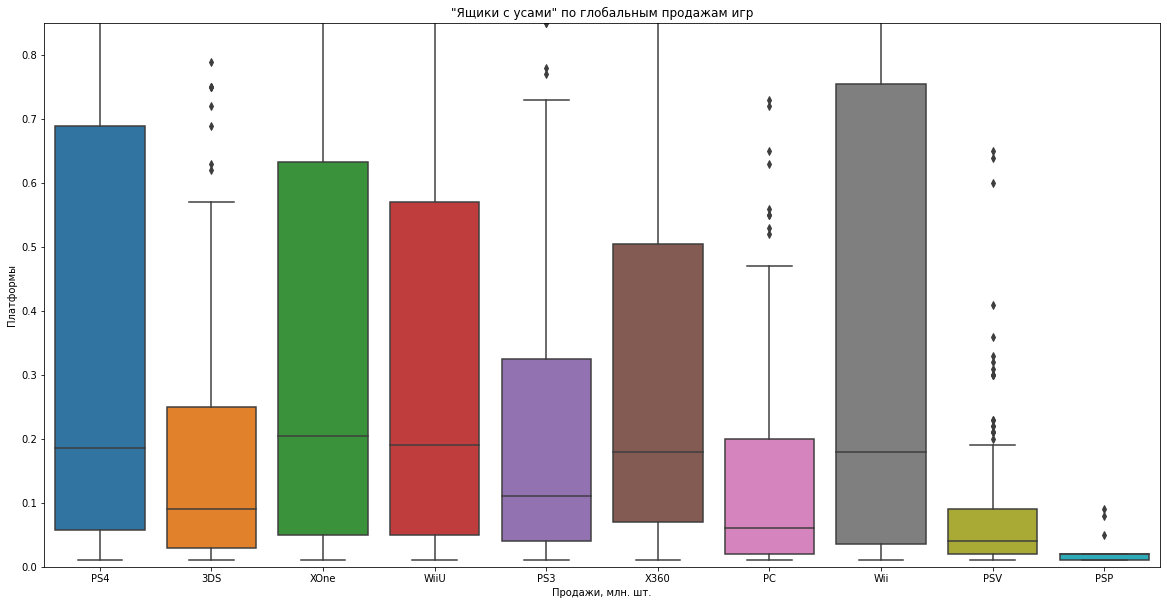

In [ ]:
plt.figure(figsize=(20, 10))

sns.boxplot(data=topical_period, x='platform', y='general_sales')

plt.ylim(0, .85)

plt.title('"Ящики с усами" по глобальным продажам игр')
plt.xlabel('Продажи, млн. шт.')
plt.ylabel('Платформы')

plt.show()

In [ ]:
topical_period.groupby('platform')['general_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


У всех платформ среднее значение продаж значительно больше медианного. Наибольшее стандартное отклонение наблюдается у платформ PS4, 3DS, WiiU, XOne.

#### Влияние отзывов пользователей и критиков на продажи у XOne .

Text(0.5, 1.0, 'Влияние отзывов критиков на продажи')

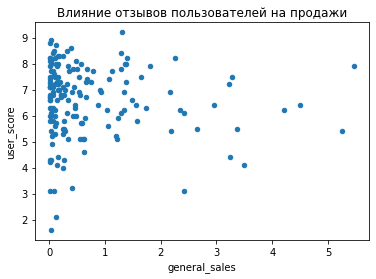

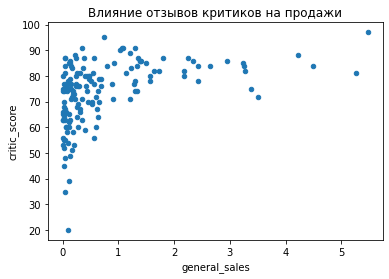

In [ ]:
topical_period[topical_period['platform'] == 'XOne'].plot(x='general_sales', y='user_score', kind='scatter')
plt.title('Влияние отзывов пользователей на продажи')
topical_period[topical_period['platform'] == 'XOne'].plot(x='general_sales', y='critic_score', kind='scatter')
plt.title('Влияние отзывов критиков на продажи')

Вычислим коэффициенты корреляции Пирсона попарно между отзывами и продажами.

In [ ]:
display("Коэффициент корреляции Пирсона между продажами и оценкой пользователей: ",
    topical_period[topical_period['platform'] == 'XOne']['general_sales']
        .corr(topical_period[topical_period['platform'] == 'XOne']['user_score'])
)
display("Коэффициент корреляции Пирсона между продажами и оценкой критиков: ",
    topical_period[topical_period['platform'] == 'XOne']['general_sales']
        .corr(topical_period[topical_period['platform'] == 'XOne']['critic_score'])
)

'Коэффициент корреляции Пирсона между продажами и оценкой пользователей: '

-0.0703839280647581

'Коэффициент корреляции Пирсона между продажами и оценкой критиков: '

0.42867694370333226

Объём продаж и оценки пользователей практически не коррелируют. Между объёмом продаж и оценками критиков наблюдается слабая прямая корреляция.

#### Влияние отзывов критиков и пользователей на продажи игр на остальных платформах.

Вычислим коэффициенты корреляции Пирсона попарно между отзывами и продажами.

In [ ]:
display("Коэффициент корреляции Пирсона между продажами и оценкой пользователей: ",
    topical_period[topical_period['platform'] != 'XOne']['general_sales']
        .corr(topical_period[topical_period['platform'] != 'XOne']['user_score'])
)
display("Коэффициент корреляции Пирсона между продажами и оценкой критиков: ",
    topical_period[topical_period['platform'] != 'XOne']['general_sales']
        .corr(topical_period[topical_period['platform'] != 'XOne']['critic_score'])
)

'Коэффициент корреляции Пирсона между продажами и оценкой пользователей: '

-0.0025949515406363936

'Коэффициент корреляции Пирсона между продажами и оценкой критиков: '

0.302042487886709

Для остальных платформ выводы по корреляции такие же: практически нет связи между продажами и оценкой пользователей, и совсем небольшая прямая связь между продажами и оценками критиков.

#### Анализ распределения игр по жанрам.

Общее распределение игр по жанрам.

In [ ]:
topical_period['genre'].value_counts()

Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64

Абсолютный лидер жанр по представленности в выборке - Action. Далее - Misc, Sports, Adventure, Role-Playing.

Проверим объёмы продаж по жанрам.

In [ ]:
(
    topical_period
    .pivot_table(index='genre', values='general_sales', aggfunc='sum')
    .sort_values('general_sales', ascending=False)
)

,general_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


Наиболее прибыльные жанры: Action, Shooter, Sports, Role-Playing, Misc.

Посмотрим на числовое описание данных по продажам игр в различных жанрах.

In [ ]:
topical_period.groupby('genre')['general_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,619.0,0.322068,0.798181,0.01,0.0300,0.090,0.2800,12.62
Adventure,185.0,0.094865,0.203147,0.01,0.0200,0.030,0.0800,1.66
Fighting,60.0,0.470333,1.188053,0.01,0.0600,0.125,0.3200,7.55
Misc,113.0,0.332301,0.736999,0.01,0.0300,0.090,0.3200,5.27
Platform,38.0,0.476053,0.722561,0.01,0.0625,0.140,0.4675,3.21
Puzzle,14.0,0.157857,0.320629,0.01,0.0200,0.045,0.1000,1.19
Racing,69.0,0.398841,0.963716,0.01,0.0300,0.090,0.2500,7.09
Role-Playing,221.0,0.459005,1.177284,0.01,0.0500,0.110,0.3600,11.68
Shooter,128.0,1.335469,2.050567,0.01,0.1725,0.515,1.6175,14.63


- У наиболее прибыльных жанров наблюдаем значительную разницу между средними и медианными значениями и большое значение стандартных отклонений, что свидетельствует о неоднородности данных.
- Для жанров, приносящих меньше прибыли характерно более низкое стандартное отклонение, но разница между медианой и средним всё же довольно высокая. 
- После рассмотрения медианных и средних значений можно сделать заключение: жанром-лидером со стабильными продажами с большим отрывом от конкурентов является Shooter.

### Вывод

- Большая часть выпущенных игр в представленной выборке приходится на период с 2002 до 2016 года.
- Периодичность "жизненного" цикла игровых платформ составляет 8-10 лет.
- Перспективные платформы (находятся в зоне роста или стагнации по продажам): PS4, XOne, PSP.
- Вычисление коэффициентов корреляции Пирсона дало следующие результаты: 
    - практически нет связи между продажами и оценкой пользователей.
    - совсем небольшая прямая связь между продажами и оценками критиков.
- Жанры-лидеры по представленности в выборке - Action, Role-Playing, Adventure, Sports, Shooter.
- Наиболее прибыльный жанр: Shooter.

## Составление портрета пользователя каждого региона

In [ ]:
topical_period.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Unknown,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,Unknown,7.98


### Определение топ-5 по популярности платформ для каждого региона

In [ ]:
display(
    topical_period
    .pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values('na_sales', ascending=False)
    .head()
)
display(
    topical_period
    .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values('eu_sales', ascending=False)
    .head()
)
display(
    topical_period
    .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values('jp_sales', ascending=False)
    .head()
)

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


- В Северной Америке и Европе выбор игровых платформ схож, в Японии - игроки в целом отдают предпочтения другим приставкам.
- Американские пользователи одинаково примерно в раной степени покупают игры двух лидирующих платформ: PS4 и XOne.
- В Европе явное предпочтение отдаётся PS4.
- В Японии пользователи больше интересуются Nintendo 3DS.

### Определение топ-5 по популярности жанров в каждом регионе

In [ ]:
display(
    topical_period
    .pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values('na_sales', ascending=False)
    .head()
)
display(
    topical_period
    .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values('eu_sales', ascending=False)
    .head()
)
display(
    topical_period
    .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values('jp_sales', ascending=False)
    .head()
)

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


- Жанры-лидеры продаж в Северной Америке полностью совпадают с разницей в объёмах около 1.5 раза.
- В Японии жанры в целом те же, только предпочтения распределены иначе.
- Самый популярный жанр игр - Action.

### Влияние рейтинга ESRB на продажи в отдельном регионе

In [ ]:
display(
    topical_period
    .pivot_table(index=['platform', 'rating'], values='na_sales', aggfunc='sum')
    .sort_values('na_sales', ascending=False)
    .head(10)
)
display(
    topical_period
    .pivot_table(index=['platform', 'rating'], values='eu_sales', aggfunc='sum')
    .sort_values('eu_sales', ascending=False)
    .head(10)
)
display(
    topical_period
    .pivot_table(index=['platform', 'rating'], values='jp_sales', aggfunc='sum')
    .sort_values('jp_sales', ascending=False)
    .head(10)
)

na_sales
platform rating           
XOne     M           38.42
PS4      M           37.72
         Unknown     23.31
         T           16.38
XOne     Unknown     14.41
PS4      E           14.38
3DS      Unknown     13.32
XOne     E           10.97
         T           10.06
X360     M            8.62

eu_sales
platform rating           
PS4      M           52.81
         Unknown     27.69
         E           25.14
XOne     M           21.06
PS4      T           18.31
3DS      Unknown      8.96
XOne     E            8.74
         Unknown      8.12
PS3      E            7.62
PC       M            7.48

jp_sales
platform rating           
3DS      Unknown     33.24
PSV      Unknown      9.36
PS4      Unknown      6.25
PS3      Unknown      6.10
PS4      M            4.87
3DS      T            4.57
         E            4.07
PSV      T            4.05
WiiU     E            3.42
PS4      T            2.97

Выводы:
- В Северной Америке и Европе у наиболее популярных платформ стоит рейтинг M, но явной связи не прослеживается.
- В Японии у самых популярных платформ отсутствует рейтинг. Вероятно, это имеет отношение к тому, что присваиванием этих рейтингов занимается американская компания.

### Вывод

- В Северной Америке и Европе выбор игровых платформ схож, в Японии - игроки в целом отдают предпочтения другим приставкам.
- Американские пользователи одинаково примерно в раной степени покупают игры двух лидирующих платформ: PS4 и XOne.
- В Европе явное предпочтение отдаётся PS4.
- В Японии пользователи больше интересуются Nintendo 3DS.
    
- Жанры-лидеры продаж в Северной Америке полностью совпадают с разницей в объёмах около 1.5 раза.
- В Японии жанры в целом те же, только предпочтения распределены иначе.
- Самый популярный жанр игр - Action.

- В Северной Америке и Европе у наиболее популярных платформ стоит рейтинг M, но явной связи между рейтингом и популярностью не прослеживается.
- В Японии у самых популярных платформ отсутствует рейтинг. Вероятно, это имеет отношение к тому, что присваиванием этих рейтингов занимается американская компания.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза: средние пользовательские рейтинги платформы Xbox One равны средним пользовательским рейтингам платформы PC. Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC различаются.

Для проверки нулевой гипотезы используем ttest.

In [ ]:
alpha = .01

results = st.ttest_ind(
    topical_period[topical_period['platform'] == 'PC']['user_score'].dropna(), 
    topical_period[topical_period['platform'] == 'XOne']['user_score'].dropna()
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Проведённый статистический тест не позволяет нам отвергнуть нулевую гипотезу. Но и утверждать, что средние пользовательские рейтинги платформ Xbox One и PC различаются на его основании мы не можем.

### Средние пользовательские рейтинги жанров Action и Sports разные

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны. Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.

In [ ]:
alpha = .01

results = st.ttest_ind(
    topical_period[topical_period['genre'] == 'Action']['user_score'].dropna(), 
    topical_period[topical_period['genre'] == 'Sports']['user_score'].dropna()
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Проведённый статистический тест позволяет отвергнуть нулевую гипотезу. Но утверждать, что средние пользовательские рейтинги жанров Action и Sports разные на его основании мы не можем.

## Общий вывод

По итогам проведённого исследования можем сделать следующие заключения:
- Большая часть выпущенных игр в представленной выборке приходится на период с 2002 до 2016 года.
- Периодичность "жизненного" цикла игровых платформ составляет 8-10 лет.
- Перспективные платформы (находятся в зоне роста или стагнации по продажам): PS4, XOne, PSP.
- Вычисление коэффициентов корреляции Пирсона дало следующие результаты: 
    - практически нет связи между продажами и оценкой пользователей.
    - совсем небольшая прямая связь между продажами и оценками критиков.
- Жанры-лидеры по представленности в выборке - Action, Role-Playing, Adventure, Sports, Shooter.
- Наиболее прибыльный жанр: Shooter.


- В Северной Америке и Европе выбор игровых платформ схож, в Японии - игроки в целом отдают предпочтения другим приставкам.
- Американские пользователи одинаково примерно в раной степени покупают игры двух лидирующих платформ: PS4 и XOne.
- В Европе явное предпочтение отдаётся PS4.
- В Японии пользователи больше интересуются Nintendo 3DS.
    
- Жанры-лидеры продаж в Северной Америке полностью совпадают с разницей в объёмах около 1.5 раза.
- В Японии жанры в целом те же, только предпочтения распределены иначе.
- Самый популярный жанр игр - Action.

- В Северной Америке и Европе у наиболее популярных платформ стоит рейтинг M, но явной связи между рейтингом и популярностью не прослеживается.
- В Японии у самых популярных платформ отсутствует рейтинг. Вероятно, это имеет отношение к тому, что присваиванием этих рейтингов занимается американская компания.


- Проверка гипотез:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые: проведённый статистический тест не позволяет нам отвергнуть нулевую гипотезу. Но и утверждать, что средние пользовательские рейтинги платформ Xbox One и PC различаются на его основании мы не можем.
    - Средние пользовательские рейтинги жанров Action и Sports разные: проведённый статистический тест позволяет отвергнуть нулевую гипотезу. Но утверждать, что средние пользовательские рейтинги жанров Action и Sports разные на его основании мы не можем.